In [12]:
import sys
import pandas as pd
from helpers.plot_helper import PlotHelper
import matplotlib.pyplot as plt

### Load JSON dataset by pandas

In [2]:
ratings_sparseness_dataframe = pd.read_json('../data/ratings_sparseness.json')
ratings_sparseness_dict = ratings_sparseness_dataframe.to_dict()

### Display dataset

In [3]:
ratings_sparseness_dataframe = ratings_sparseness_dataframe.transpose()
display(ratings_sparseness_dataframe)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10
saeed,4,2,5,-,2,3,4,5,-,-
abbas,3,-,4,2,-,-,-,-,-,-
alireza,3,-,4,5,2,3,4,5,5,5


### Distance metric implementation

In [4]:
def get_manhattan_distance(rating1,rating2):
    
    rating1 = dict(filter(lambda x: x[1] != '-', rating1.items()))
    rating2 = dict(filter(lambda x: x[1] != '-', rating2.items()))
    
    distance = 0
    for key in rating1:
        if key in rating2:
            distance += abs(rating1[key] - rating2[key])
    return distance

dt=ratings_sparseness_dict

print('saeed-alireza:%f'%get_manhattan_distance(dt['saeed'],dt['alireza']))
print('saeed-abbas:%f'%+get_manhattan_distance(dt['saeed'],dt['abbas']))

saeed-alireza:2.000000
saeed-abbas:2.000000


In [5]:
def get_euclidean_distance(rating1,rating2):
    
    
    rating1 = dict(filter(lambda x: x[1] != '-', rating1.items()))
    rating2 = dict(filter(lambda x: x[1] != '-', rating2.items()))
    
    distance = 0
    for key in rating1:
        if key in rating2:
            distance += pow(abs(rating1[key]-rating2[key]), 2)
    return pow(distance, 1/2)

dt=ratings_sparseness_dict

print('saeed-alireza:%f'%get_euclidean_distance(dt['saeed'],dt['alireza']))
print('saeed-abbas:%f'%+get_euclidean_distance(dt['saeed'],dt['abbas']))

saeed-alireza:1.414214
saeed-abbas:1.414214


In [38]:
def dot(A,B): 
    return (sum(a*b for a,b in zip(A,B)))

def cosine_similarity(rating1,rating2):
    rating1 = dict(filter(lambda x: x[1] != '-', rating1.items()))
    rating2 = dict(filter(lambda x: x[1] != '-', rating2.items()))
    a = rating1.values()
    b = rating2.values()
    return dot(a,b) / ( (dot(a,a) **.5) * (dot(b,b) ** .5) )

dt=ratings_sparseness_dict

print('saeed-alireza:%f'%cosine_similarity(dt['saeed'],dt['alireza']))
print('saeed-abbas:%f'%+cosine_similarity(dt['saeed'],dt['abbas']))

saeed-alireza:0.801784
saeed-abbas:0.559893


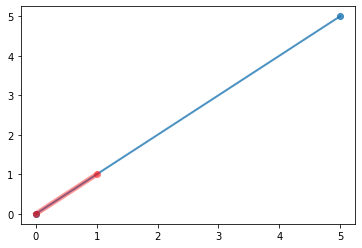

In [40]:
d1={"m1":5,"m3":5}
d2={"m1":1,"m3":1}
plt.plot([0,5],[0,5], marker='o', linewidth=2,alpha=.8,label="d1")
plt.plot([0,1],[0,1], marker='o', linewidth=5,alpha=.4,color="red",label="d1")
print('d1-d2:%f'%+cosine_similarity(d1,d2))

d1-d2:0.000000


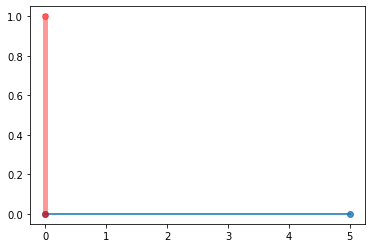

In [46]:
d1={"m1":5,"m3":0}
d2={"m1":0,"m3":5}
plt.plot([0,5],[0,0], marker='o', linewidth=2,alpha=.8,label="d1")
plt.plot([0,0],[0,1], marker='o', linewidth=5,alpha=.4,color="red",label="d1")
print('d1-d2:%f'%+cosine_similarity(d1,d2))

d1-d2:-1.000000


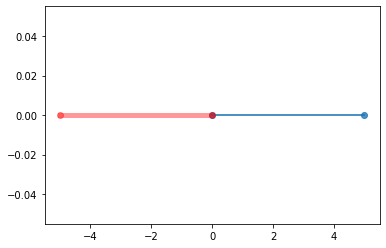

In [51]:
d1={"m1":0,"m3":5}
d2={"m1":0,"m3":-5}
plt.plot([0,5],[0,0], marker='o', linewidth=2,alpha=.8,label="d1")
plt.plot([0,-5],[0,0], marker='o', linewidth=5,alpha=.4,color="red",label="d1")
print('d1-d2:%f'%+cosine_similarity(d1,d2))